In [ ]:
!nvidia-smi

Fri Jul 22 15:31:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |   3145MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tsai 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tsai.all import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
df = pd.read_csv('FINALoutputFINAL_RESAMPLED_DATA_0_3000 (2).csv', nrows = 2000)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

,0,1,2,3,4,5,6,7,8,9,...,17014,17015,17016,17017,17018,17019,17020,17021,17022,target
0,0.919597,0.901837,0.884078,0.866318,0.848559,0.830799,0.813040,0.795280,0.777520,0.761260,...,0.934588,0.906371,0.878155,0.849939,0.821723,0.793506,0.765290,0.737074,0.708858,1
1,1.025398,1.025212,1.025025,1.024838,1.024651,1.024464,1.024277,1.024090,1.023903,1.023717,...,1.020692,1.021128,1.021563,1.021998,1.022433,1.022868,1.023304,1.023739,1.024174,0
2,1.071332,1.079350,1.087369,1.095387,1.103405,1.111423,1.119442,1.127460,1.135478,1.143496,...,1.198349,1.211614,1.224880,1.238145,1.251410,1.264676,1.277941,1.291207,1.304472,1
3,1.017824,1.016045,1.014266,1.012487,1.010707,1.008928,1.007149,1.005370,0.997640,0.977580,...,1.103205,1.086110,1.072831,1.059551,1.046272,1.032992,1.019713,1.006433,0.993154,1
4,0.939003,0.930363,0.921722,0.913081,0.904440,0.895799,0.887159,0.878518,0.869877,0.861236,...,0.966289,0.970586,0.974884,0.979181,0.983479,0.987776,0.992074,0.996371,1.000669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.940221,0.998629,1.057038,1.107247,1.112567,1.117888,1.118134,1.107029,1.095924,1.098439,...,1.080466,1.120964,1.161462,1.030813,0.823658,0.616502,0.703420,0.844059,0.984698,1
1996,0.775877,0.769433,0.762989,0.756546,0.750102,0.743659,0.737215,0.730771,0.724328,0.717884,...,0.624848,0.617507,0.610167,0.602826,0.595485,0.588144,0.580804,0.573463,0.566122,0
1997,0.499123,0.614550,0.729978,0.845406,0.886392,0.893569,0.900746,0.933609,1.009217,1.084825,...,1.019125,0.910672,0.889229,0.920075,0.950920,0.936620,0.822915,0.709211,0.595506,1
1998,0.969595,0.955783,0.941971,0.928160,0.946458,0.979295,1.012132,1.029307,1.020563,1.011818,...,0.946908,0.918852,0.929866,0.964489,0.999111,1.023156,1.023840,1.024524,1.025209,0


In [ ]:
head = df.head()

In [ ]:
time_series_df = df.drop(columns=['target'])


new = pd.DataFrame()
for index, row in time_series_df.iterrows():
    current_row = row
    new_row = signal.resample(current_row, 1000)
    new_row_df = pd.DataFrame(new_row).transpose()
    new = pd.concat([new, new_row_df], ignore_index = True)

new

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.806529,1.013829,0.879781,0.740480,1.078448,1.079494,1.205647,1.016582,0.998054,0.807302,...,0.909059,1.057714,1.020458,1.161589,0.827483,0.978321,0.939406,0.932613,1.171312,1.055496
1,1.024074,1.022202,1.019319,1.014476,1.005730,0.994497,0.992547,1.009377,1.027495,1.036872,...,1.019698,1.023313,1.028501,1.033049,1.037917,1.029103,1.016007,1.004986,1.009547,1.017248
2,1.177754,1.189966,1.327180,1.206777,1.099284,1.008419,0.956484,0.962505,0.983430,0.962344,...,0.942792,1.103098,1.242817,1.118115,0.955882,0.957846,0.954108,0.914620,0.876535,1.113216
3,1.019033,0.996209,0.943090,0.993455,0.988574,1.002082,0.846017,1.037549,1.117276,1.217248,...,1.040258,1.055843,0.854857,1.007868,0.873980,1.011435,0.971165,1.185321,1.012886,1.107944
4,0.899672,1.008159,0.955895,0.987437,0.795127,0.659782,0.743159,0.920992,0.843374,0.795589,...,0.974108,1.129610,1.112341,1.152754,0.986320,1.106488,1.091534,1.213955,1.055495,0.997215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.977284,1.010108,1.101341,0.919743,1.014590,1.030599,0.943058,1.021064,0.988514,1.122131,...,0.960862,1.077936,0.849966,1.026686,1.121831,1.116002,1.025391,0.973067,1.049187,0.971736
1996,0.675593,0.682608,0.574964,0.588467,0.570692,0.582240,0.637080,0.730371,0.815294,0.896590,...,0.841216,0.741914,0.771316,0.836964,0.686716,0.591052,0.848491,0.896298,0.809579,0.665746
1997,0.863195,1.014963,0.876738,0.950667,1.010042,1.039697,1.012055,1.067854,1.032135,1.002982,...,0.984403,1.148475,0.952232,1.039021,1.097986,0.963933,0.953707,1.005520,1.095859,1.019183
1998,0.981797,1.019402,1.004172,0.995135,0.988305,1.005560,0.983300,0.990605,0.979661,0.989588,...,1.016139,0.968471,1.004393,1.013335,0.991482,1.014717,0.991878,0.985007,0.968604,0.998515


In [ ]:
new['target'] = df['target']
new

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,0.806529,1.013829,0.879781,0.740480,1.078448,1.079494,1.205647,1.016582,0.998054,0.807302,...,1.057714,1.020458,1.161589,0.827483,0.978321,0.939406,0.932613,1.171312,1.055496,1
1,1.024074,1.022202,1.019319,1.014476,1.005730,0.994497,0.992547,1.009377,1.027495,1.036872,...,1.023313,1.028501,1.033049,1.037917,1.029103,1.016007,1.004986,1.009547,1.017248,0
2,1.177754,1.189966,1.327180,1.206777,1.099284,1.008419,0.956484,0.962505,0.983430,0.962344,...,1.103098,1.242817,1.118115,0.955882,0.957846,0.954108,0.914620,0.876535,1.113216,1
3,1.019033,0.996209,0.943090,0.993455,0.988574,1.002082,0.846017,1.037549,1.117276,1.217248,...,1.055843,0.854857,1.007868,0.873980,1.011435,0.971165,1.185321,1.012886,1.107944,1
4,0.899672,1.008159,0.955895,0.987437,0.795127,0.659782,0.743159,0.920992,0.843374,0.795589,...,1.129610,1.112341,1.152754,0.986320,1.106488,1.091534,1.213955,1.055495,0.997215,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.977284,1.010108,1.101341,0.919743,1.014590,1.030599,0.943058,1.021064,0.988514,1.122131,...,1.077936,0.849966,1.026686,1.121831,1.116002,1.025391,0.973067,1.049187,0.971736,1
1996,0.675593,0.682608,0.574964,0.588467,0.570692,0.582240,0.637080,0.730371,0.815294,0.896590,...,0.741914,0.771316,0.836964,0.686716,0.591052,0.848491,0.896298,0.809579,0.665746,0
1997,0.863195,1.014963,0.876738,0.950667,1.010042,1.039697,1.012055,1.067854,1.032135,1.002982,...,1.148475,0.952232,1.039021,1.097986,0.963933,0.953707,1.005520,1.095859,1.019183,1
1998,0.981797,1.019402,1.004172,0.995135,0.988305,1.005560,0.983300,0.990605,0.979661,0.989588,...,0.968471,1.004393,1.013335,0.991482,1.014717,0.991878,0.985007,0.968604,0.998515,0


In [ ]:
df = new

In [ ]:
df.shape

(2000, 1001)

In [ ]:
X, y = df2xy(df, target_col='target')
test_eq(X.shape, (df.shape[0], 1, df.shape[1]-1))
test_eq(y.shape, (df.shape[0], ))

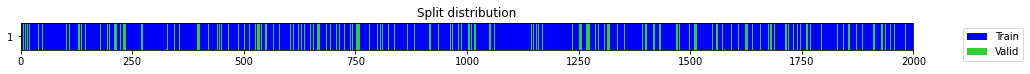

((#1600) [887,1167,580,1322,448,700,1790,957,486,148...],
 (#400) [1741,1150,1011,1561,1455,637,233,1852,1,1415...])

In [ ]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits

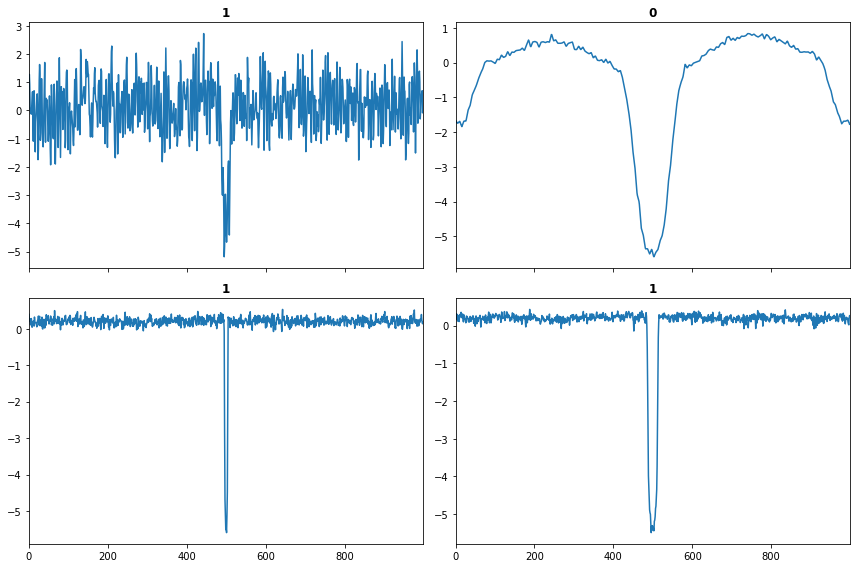

In [ ]:
bs = 4
n_epochs = 100
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs, batch_tfms=TSStandardize())
dls.show_batch()

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,0.810296,0.621554,0.762004,0.747500,00:22
1,0.811947,0.634891,0.764631,0.720000,00:23
2,0.822752,0.622143,0.784572,0.737500,00:23
3,0.801723,0.593351,0.795414,0.757500,00:23
4,0.747113,0.615167,0.799812,0.740000,00:23
5,0.731462,0.648399,0.802163,0.710000,00:22
6,0.684161,0.592948,0.819034,0.770000,00:23
7,0.705599,0.586814,0.813669,0.752500,00:23
8,0.661348,0.628120,0.816102,0.722500,00:23
9,0.657596,0.655795,0.817015,0.777500,00:23


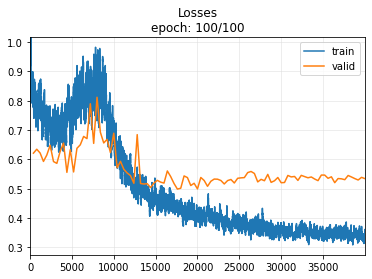

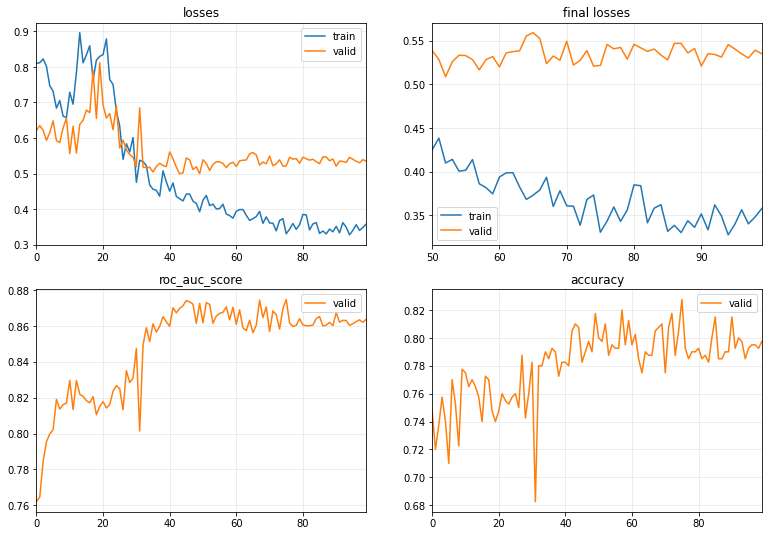

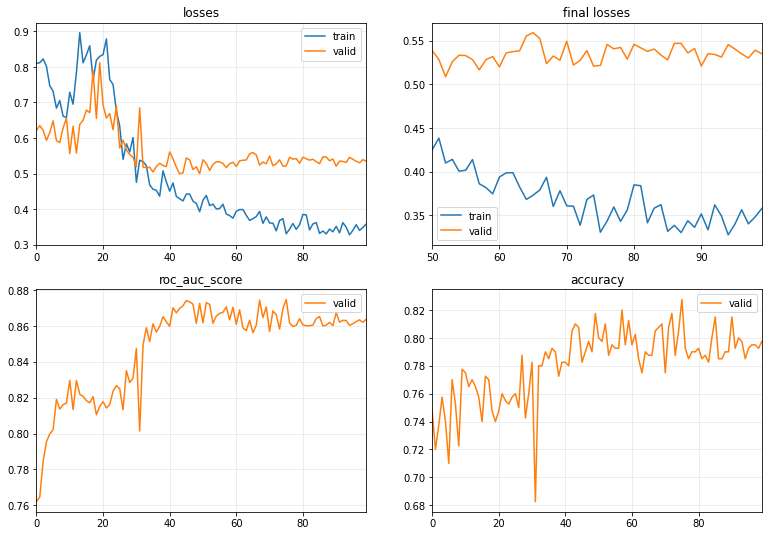

In [ ]:
model = TST(dls.vars, dls.c, dls.len, dropout=0.3, fc_dropout=0.9)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
learn.fit_one_cycle(n_epochs, 1e-4) 
learn.plot_metrics()
